In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib



In [3]:
# Load the dataset
file_path = "/content/Unemployment in India.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

In [4]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Head:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Dataset Head:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pr

In [5]:
# Remove rows that are completely empty or NaN
df.dropna(how='all', inplace=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [6]:
# Reset index after cleaning the DataFrame
df.reset_index(drop=True, inplace=True)

# Verify the new index
print(df)


             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
735     West Bengal   29-02-2020    Monthly                              7.55   
736     West Bengal   31-03-2020    Monthly                              6.67   
737     West Bengal   30-04-2020    Monthly                             15.63   
738     West Bengal   31-05-2020    Monthly                             15.22   
739     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

In [7]:
print(df.isna().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [8]:
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [9]:
# Step 1: Data Preprocessing
# Create a binary target variable
df["High_Unemployment"] = (df[" Estimated Unemployment Rate (%)"] >= 5).astype(int)

In [10]:
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,High_Unemployment
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,1
...,...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,1
736,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,1
737,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,1
738,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,1


In [11]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),High_Unemployment
count,740.000000,7.400000e+02,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,0.716216
std,10.721298,8.087988e+06,8.111094,0.451138
min,0.000000,4.942000e+04,13.330000,0.000000
25%,4.657500,1.190404e+06,38.062500,0.000000
50%,8.350000,4.744178e+06,41.160000,1.000000
75%,15.887500,1.127549e+07,45.505000,1.000000
max,76.740000,4.577751e+07,72.570000,1.000000


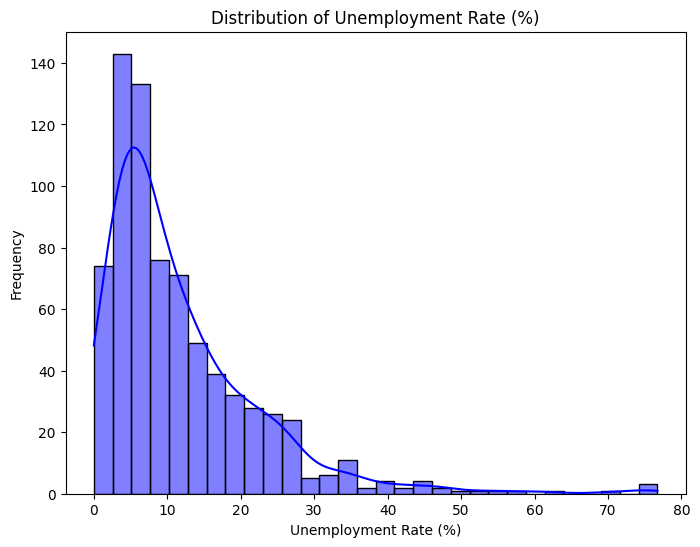

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(df[" Estimated Unemployment Rate (%)"], kde=True, bins=30, color='blue')
plt.title("Distribution of Unemployment Rate (%)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

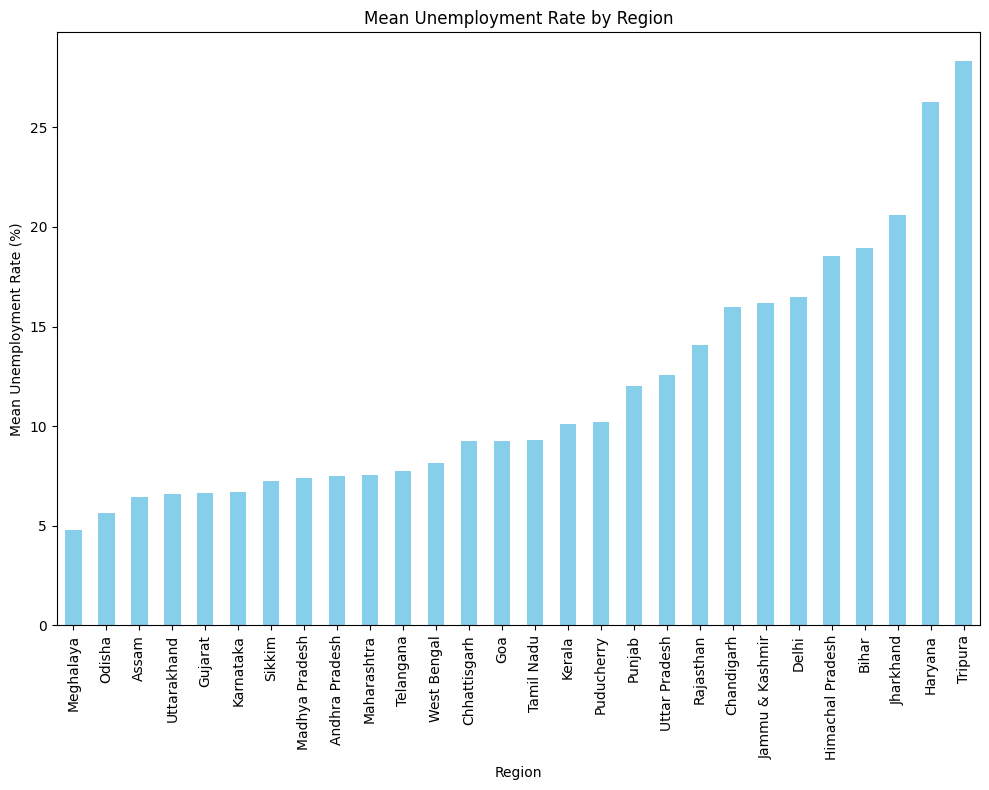

In [13]:
# Mean Unemployment Rate by Region
mean_unemployment_region = df.groupby("Region")[" Estimated Unemployment Rate (%)"].mean().sort_values()
plt.figure(figsize=(10, 8))
mean_unemployment_region.plot(kind="bar", color="skyblue")
plt.title("Mean Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Mean Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-14-d774cf7185b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Area", y=" Estimated Unemployment Rate (%)", data=df, palette="Set2")


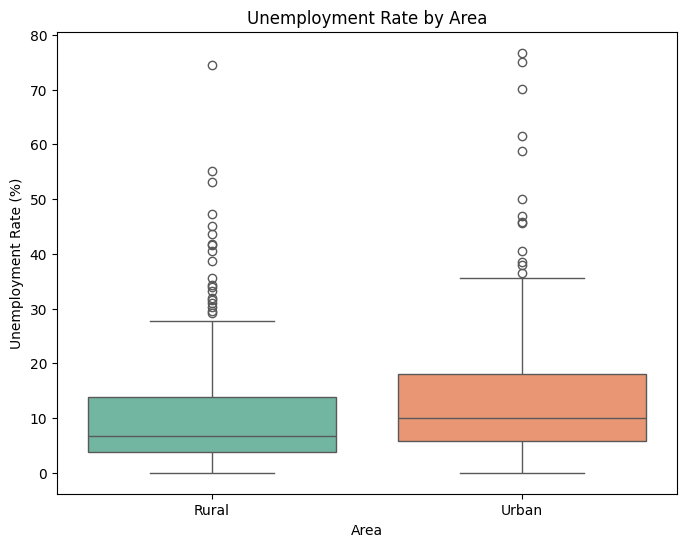

In [14]:
# Unemployment Rate by Area (Urban vs Rural)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Area", y=" Estimated Unemployment Rate (%)", data=df, palette="Set2")
plt.title("Unemployment Rate by Area")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

<ipython-input-15-10fe0295d74a>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df[" Date"])
<ipython-input-15-10fe0295d74a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Date", y=" Estimated Unemployment Rate (%)", hue="Area", ci=None)


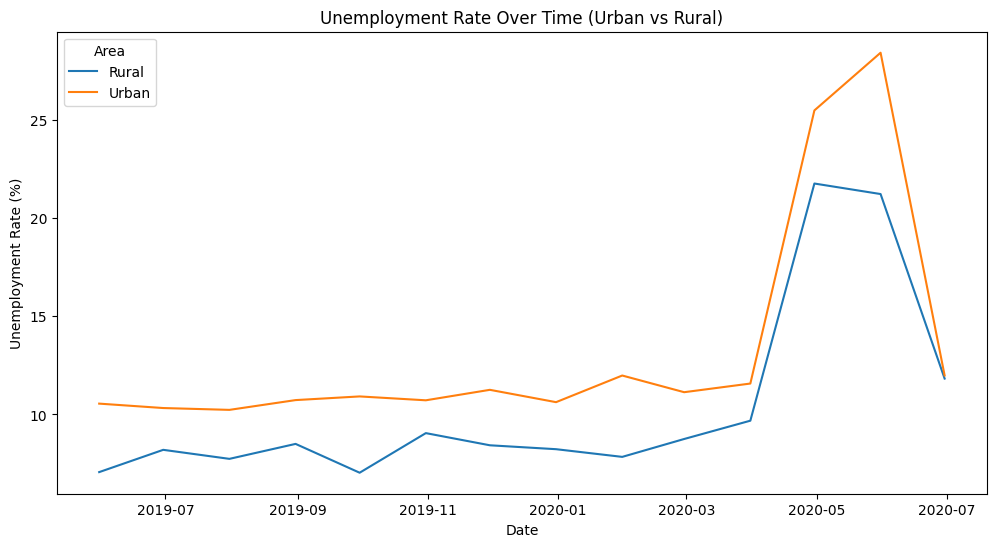

In [15]:
# Trend of Unemployment Rate Over Time
df["Date"] = pd.to_datetime(df[" Date"])
df["Month"] = df["Date"].dt.month  # Extract month from the datetime column
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y=" Estimated Unemployment Rate (%)", hue="Area", ci=None)
plt.title("Unemployment Rate Over Time (Urban vs Rural)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Area")
plt.xticks(rotation=0)
plt.show()

In [16]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,High_Unemployment,Date,Month,Day,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,0,2019-05-31,5,31,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,0,2019-06-30,6,30,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,0,2019-07-31,7,31,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,0,2019-08-31,8,31,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,1,2019-09-30,9,30,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,1,2020-02-29,2,29,2020
736,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,1,2020-03-31,3,31,2020
737,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,1,2020-04-30,4,30,2020
738,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,1,2020-05-31,5,31,2020


<ipython-input-17-f7f3ede79587>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Date", y=" Estimated Unemployment Rate (%)", data=df, palette="coolwarm")


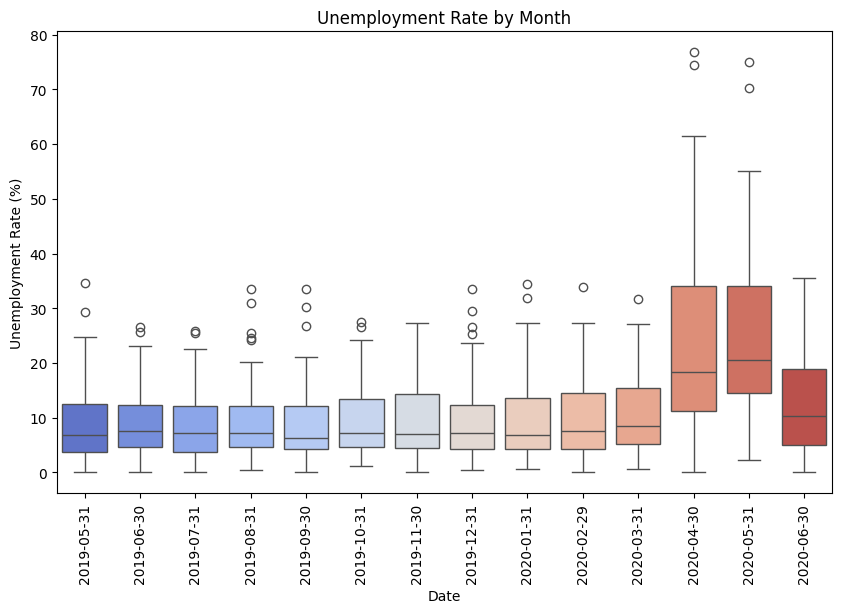

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Monthly Analysis of Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x="Date", y=" Estimated Unemployment Rate (%)", data=df, palette="coolwarm")
plt.title("Unemployment Rate by Month")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

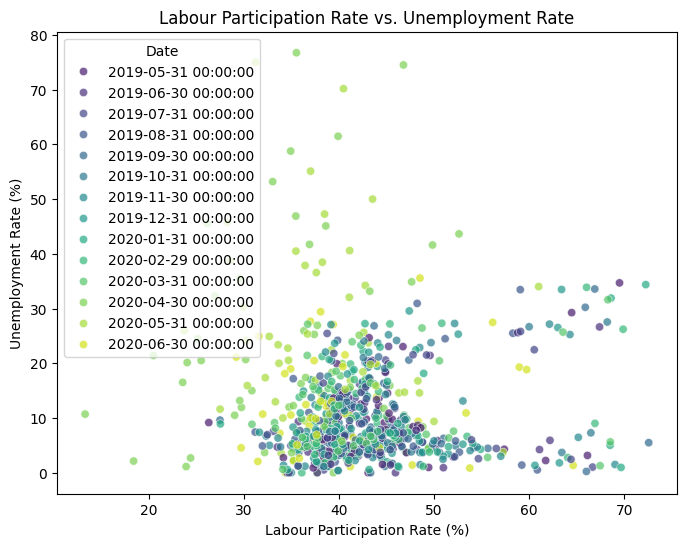

In [18]:
# Scatter plot for Labor Participation Rate vs. Unemployment Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=" Estimated Labour Participation Rate (%)",
    y=" Estimated Unemployment Rate (%)",
    hue="Date",
    palette="viridis",
    alpha=0.7
)
plt.title("Labour Participation Rate vs. Unemployment Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Date")
plt.show()


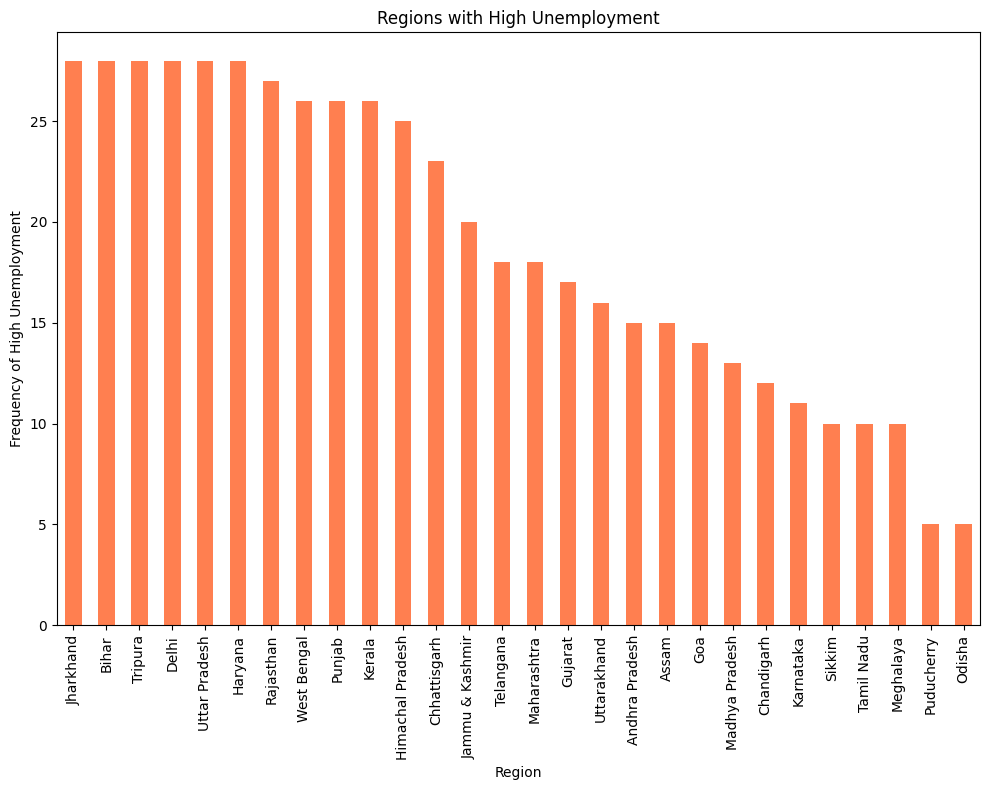

In [19]:
# Regional Distribution of High Unemployment
plt.figure(figsize=(10, 8))
high_unemployment = df[df["High_Unemployment"] == 1]
high_unemployment_region = high_unemployment["Region"].value_counts()
high_unemployment_region.plot(kind="bar", color="coral")
plt.title("Regions with High Unemployment")
plt.xlabel("Region")
plt.ylabel("Frequency of High Unemployment")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

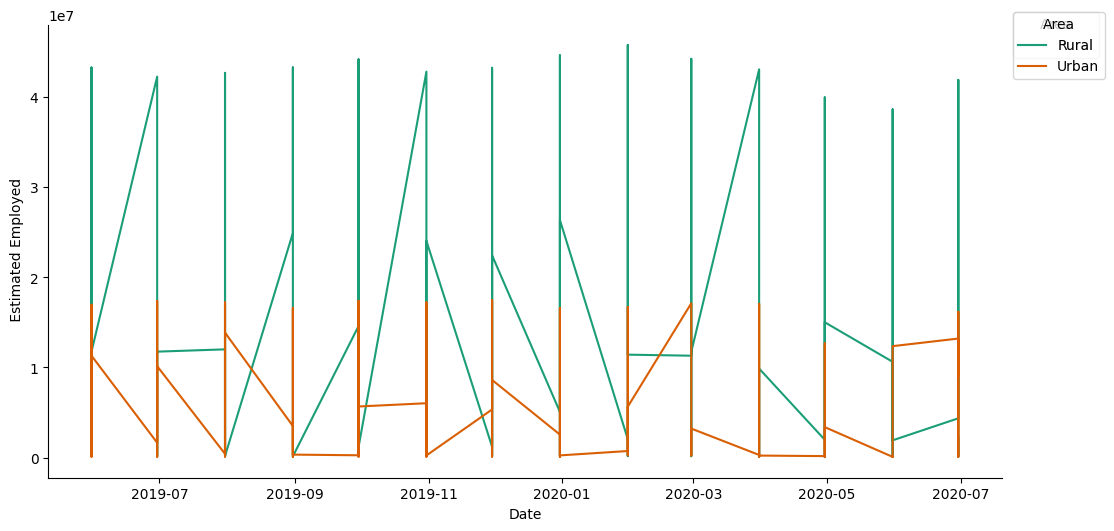

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series[' Estimated Employed']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel(' Estimated Employed')

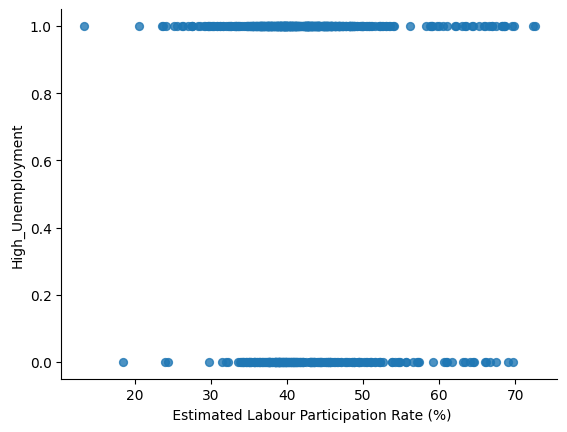

In [25]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' Estimated Labour Participation Rate (%)', y='High_Unemployment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

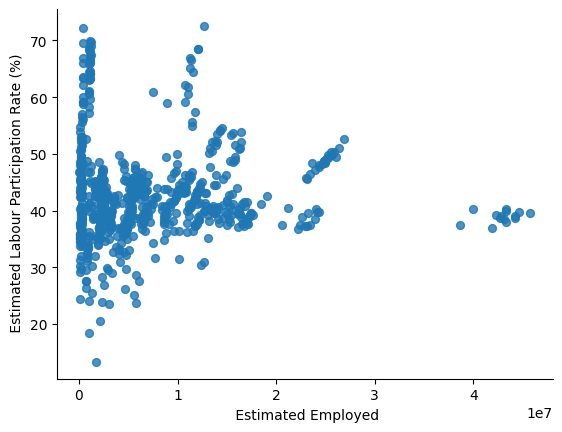

In [26]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' Estimated Employed', y=' Estimated Labour Participation Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

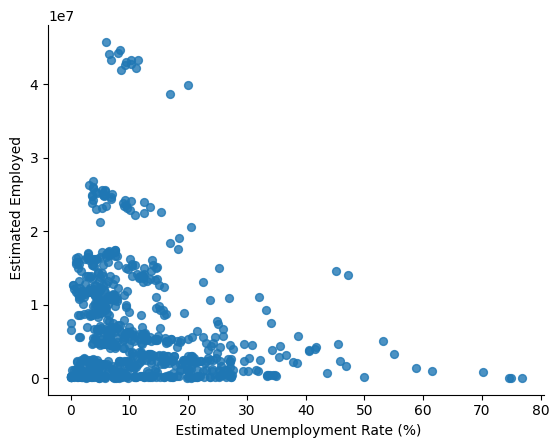

In [27]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

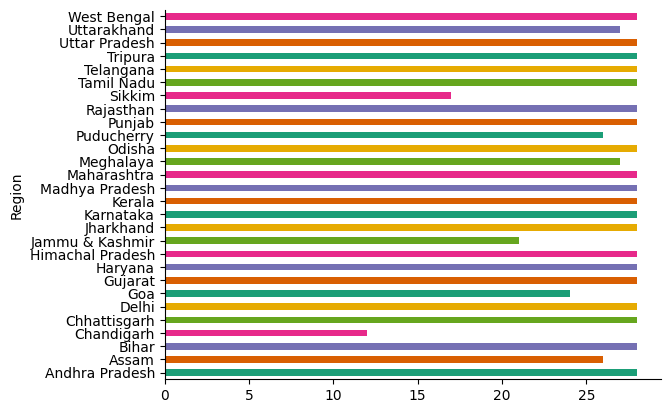

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

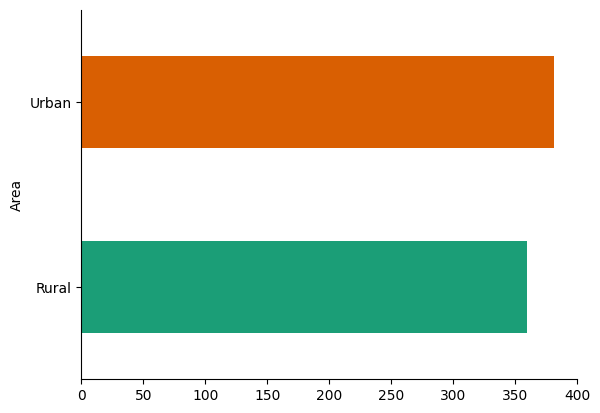

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

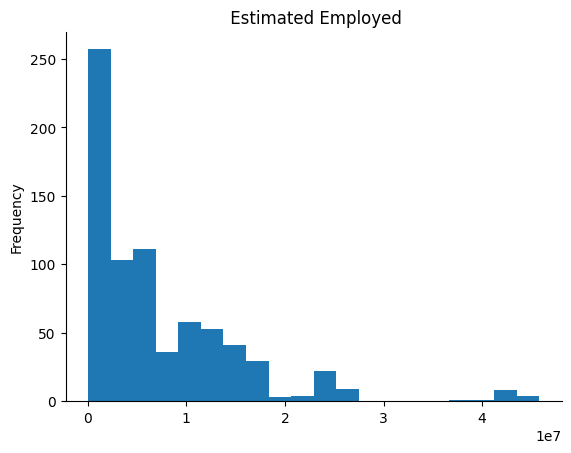

In [30]:
from matplotlib import pyplot as plt
df[' Estimated Employed'].plot(kind='hist', bins=20, title=' Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

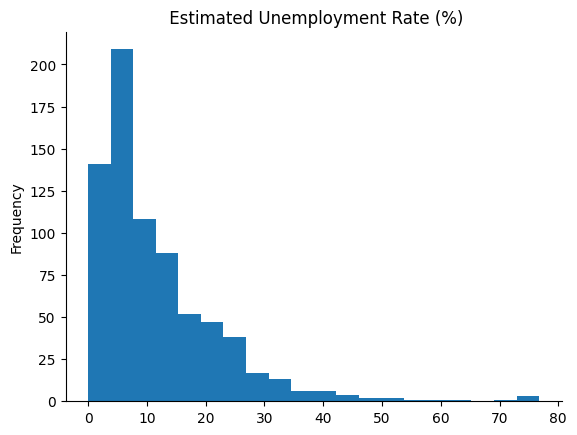

In [31]:
from matplotlib import pyplot as plt
df[' Estimated Unemployment Rate (%)'].plot(kind='hist', bins=20, title=' Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

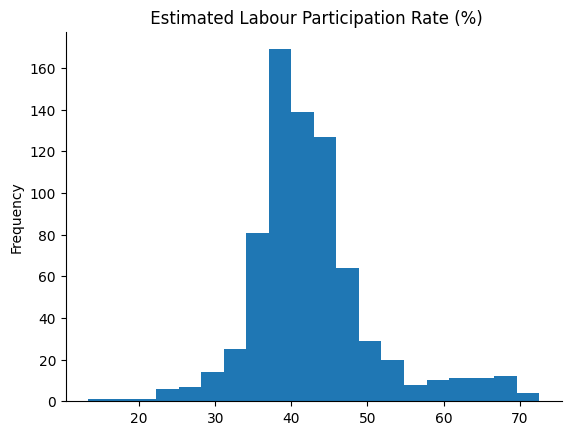

In [32]:
from matplotlib import pyplot as plt
df[' Estimated Labour Participation Rate (%)'].plot(kind='hist', bins=20, title=' Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

print(df[["Date", "Day", "Month", "Year"]].head())



        Date  Day  Month  Year
0 2019-05-31   31      5  2019
1 2019-06-30   30      6  2019
2 2019-07-31   31      7  2019
3 2019-08-31   31      8  2019
4 2019-09-30   30      9  2019


In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,High_Unemployment,Date,Month,Day,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,0,2019-05-31,5,31,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,0,2019-06-30,6,30,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,0,2019-07-31,7,31,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,0,2019-08-31,8,31,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,1,2019-09-30,9,30,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,1,2020-02-29,2,29,2020
736,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,1,2020-03-31,3,31,2020
737,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,1,2020-04-30,4,30,2020
738,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,1,2020-05-31,5,31,2020


In [ ]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'High_Unemployment', 'Date', 'Month', 'Day', 'Year'],
      dtype='object')


In [ ]:
# Step 5: Define features and target
features = ["Region", " Estimated Employed", " Estimated Labour Participation Rate (%)", "Area", "Month", "Year"]
target = "High_Unemployment"

X = df[features]
y = df[target]

# Verify features and target are correctly selected
print("Features:\n", X.head())
print("Target:\n", y.head())

Features:
            Region   Estimated Employed  \
0  Andhra Pradesh           11999139.0   
1  Andhra Pradesh           11755881.0   
2  Andhra Pradesh           12086707.0   
3  Andhra Pradesh           12285693.0   
4  Andhra Pradesh           12256762.0   

    Estimated Labour Participation Rate (%)   Area  Month  Year  
0                                     43.24  Rural      5  2019  
1                                     42.05  Rural      6  2019  
2                                     43.50  Rural      7  2019  
3                                     43.97  Rural      8  2019  
4                                     44.68  Rural      9  2019  
Target:
 0    0
1    0
2    0
3    0
4    1
Name: High_Unemployment, dtype: int64


In [ ]:
# Step 2: Encoding and Scaling
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), [" Estimated Employed", " Estimated Labour Participation Rate (%)", "Month", "Year"]),
        ("cat", OneHotEncoder(), ["Region", "Area"]),
    ]
)


In [ ]:
# Step 3: Model Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])


In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

               Region   Estimated Employed  \
244            Punjab            6025235.0   
549    Madhya Pradesh            6266446.0   
523         Karnataka            8647794.0   
486  Himachal Pradesh             232322.0   
135         Jharkhand            6958404.0   
..                ...                  ...   
71                Goa             183603.0   
106           Haryana            3914193.0   
270         Rajasthan           16076978.0   
435             Delhi            5647493.0   
102           Haryana            5062293.0   

      Estimated Labour Participation Rate (%)   Area  Month  Year  
244                                     45.79  Rural      6  2019  
549                                     37.67  Urban      7  2019  
523                                     39.00  Urban      9  2019  
486                                     49.69  Urban     10  2019  
135                                     39.66  Rural      7  2019  
..                                     

In [ ]:
# Step 5: Train the Model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [' Estimated Employed',
                                                   ' Estimated Labour '
                                                   'Participation Rate (%)',
                                                   'Month', 'Year']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Region', 'Area'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# Step 6: Model Evaluation
y_pred = pipeline.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8378378378378378
Confusion Matrix:
 [[28 15]
 [ 9 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70        43
           1       0.86      0.91      0.89       105

    accuracy                           0.84       148
   macro avg       0.81      0.78      0.79       148
weighted avg       0.83      0.84      0.83       148



In [ ]:
# Step 7: Save the Model
model_file = "logistic_regression_model.pkl"
joblib.dump(pipeline, model_file)
print(f"\nModel saved to {model_file}")



Model saved to logistic_regression_model.pkl


In [ ]:
# Step 8: Load and Predict (Example)
print("\nTesting the model with a new sample:")
model = joblib.load(model_file)
sample_data = {
    "Region": ["Andhra Pradesh"],
    " Estimated Employed": [120000],
    " Estimated Labour Participation Rate (%)": [55],
    "Area": ["Rural"],
    "Month": [10],
    "Year": [2019],
}
sample_df = pd.DataFrame(sample_data)
sample_pred = model.predict(sample_df)
print(f"Prediction for sample data (1 = High Unemployment, 0 = Low Unemployment): {sample_pred[0]}")


Testing the model with a new sample:
Prediction for sample data (1 = High Unemployment, 0 = Low Unemployment): 0
